In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt
env = gym.make("Taxi-v3")
print (env.observation_space.n ) #총 상태 수
print (env.action_space.n ) #action 수

500
6


In [210]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
learning_rate = 0.9
dis = 0.5
num_episodes = 2000

In [218]:
rList = []
rewardList = []
for i in range(num_episodes): # 게임 횟수 = num_episodes
    observation = env.reset()
    rAll = 0
    done = False
#     env.render()
    # The Q-Table learning algorithm
    while not done:
        action = np.argmax(Q[observation, :] +\
                 np.random.randn(1, env.action_space.n) / (i + 1)) # your agent here
        #아무 action 이나 수행하는 함수. (this takes random actions)
        new_observation, reward, done, info = env.step(action)
        # Update Q-Table with new knowledge using learning rate
        Q[observation, action] = (1-learning_rate) * Q[observation, action] \
             + learning_rate *(reward + dis * np.max(Q[new_observation, :]))
#         Q[observation, action] = Q[observation, action] + \
#             learning_rate * (reward + dis * np.max(Q[new_observation, :] - \
#                                                    Q[observation, action]))
#         print( "action", action, "reward", reward)
#         env.render()
        rAll += reward
        observation = new_observation
    if rAll > 0:
        rewardList.append(rAll)
    rList.append(rAll)

In [221]:
env.step(action)

(410, -10, False, {'prob': 1.0})

In [219]:
print("Success rate: " + str(len(rewardList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)

Success rate: 0.8375
Final Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.          0.          0.          0.          0.          0.        ]
 [-1.98925781 -1.97851562 -1.98925781 -1.97851562 -1.95703125 -9.        ]
 [-1.83523781 -1.65625    -1.82883718 -1.65625002 -1.3125     -9.        ]
 ...
 [-1.93065157 -0.625      -1.90757869 -1.65841791 -9.         -9.        ]
 [-1.95703125 -1.9140625  -1.95703125 -1.9140625  -9.         -9.        ]
 [-1.395      -1.305      -1.395       9.         -9.         -9.        ]]


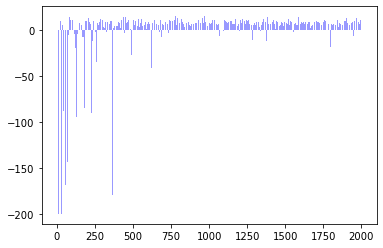

In [220]:
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()